# Correlation Analysis and Hypothesis testing


In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh
sns.set()
import warnings
warnings.simplefilter("ignore")

In [ ]:
df_pre_data = pd.read_csv('/content/compas-two-years-preprocessed',index_col= None)
df_pre_data = df_pre_data.drop('Unnamed: 0', axis=1, errors='ignore')
df_pre_data.head()

,id,name,first,last,sex,dob,age,age_cat,race,decile_score,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,1,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,3,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,4,...,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,8,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


In [ ]:
#Correlation score between person age and decile score
corr_A_D = df_pre_data['age'].corr(df_pre_data['decile_score'])
corr_A_D

-0.3877325537520373

The value of -0.388 indicates a moderate negative correlation which means that as  "age" increases, the variable "decile_score" tends to decrease. So, from the dataset and the correlation value we can say that younger individuals tend to have higher decile scores, and older individuals tend to have lower decile scores.

In [ ]:
#Correlation score  between person's age and two-year recidivism value
corr_A_TR = df_pre_data['age'].corr(df_pre_data['two_year_recid'])
corr_A_TR

-0.19032348222041895

The Correlation score  between person's age and two-year recidivism value of -0.1903 denotes a low negative correlation which means that as "age" increases, the variable "'two_year_recid" tends to decrease. So, from the dataset and the correlation value we can't strongly say that younger individuals tend to have higher recidivism score than older individuals because of low correlation value.


In [ ]:
#Correlation score between individual's decile score and two-year recidivism
corr_D_T = df_pre_data['decile_score'].corr(df_pre_data['two_year_recid'])
corr_D_T

0.3507026426945216

 A positive correlation score of 0.351 between an individual's decile score and two-year recidivism suggests that individuals with higher decile scores  are more likely to have a higher tendency of recidivism within the two-year period, and those with lower decile scores are more likely to have a lower tendency of recidivism.

## Hypothesis 1: The decline in recidivism with age is overestimated by COMPAS risk scores.

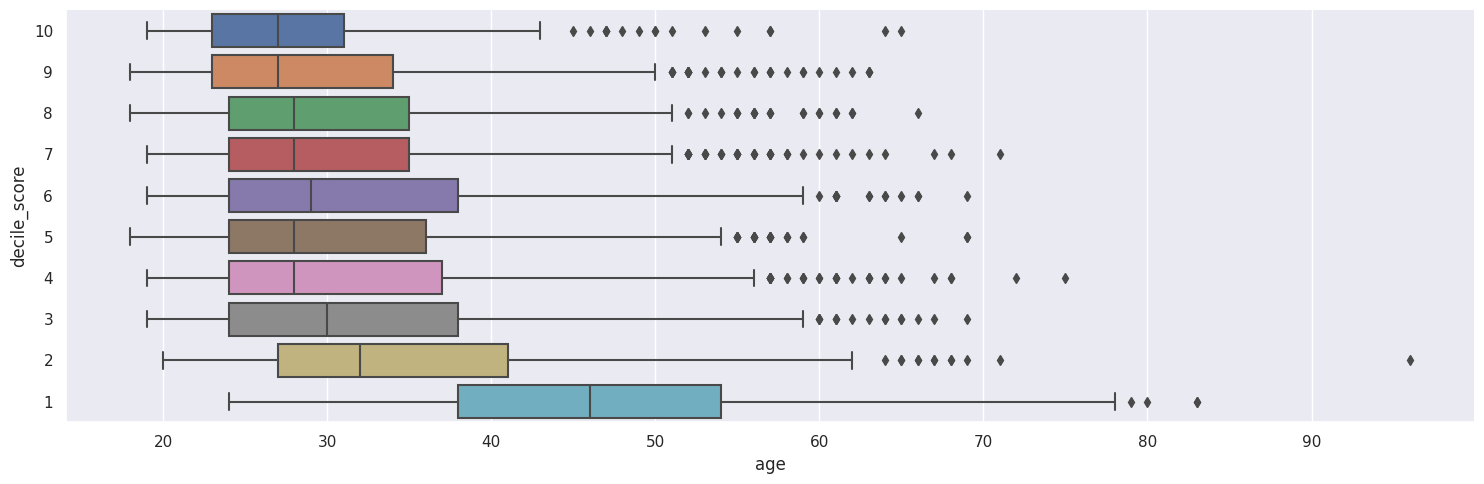

In [ ]:
sns.catplot(data=df_pre_data, x='age', y='decile_score', orient = 'h', kind = 'box', aspect = 3, order = [10,9,8,7,6,5,4,3,2,1])

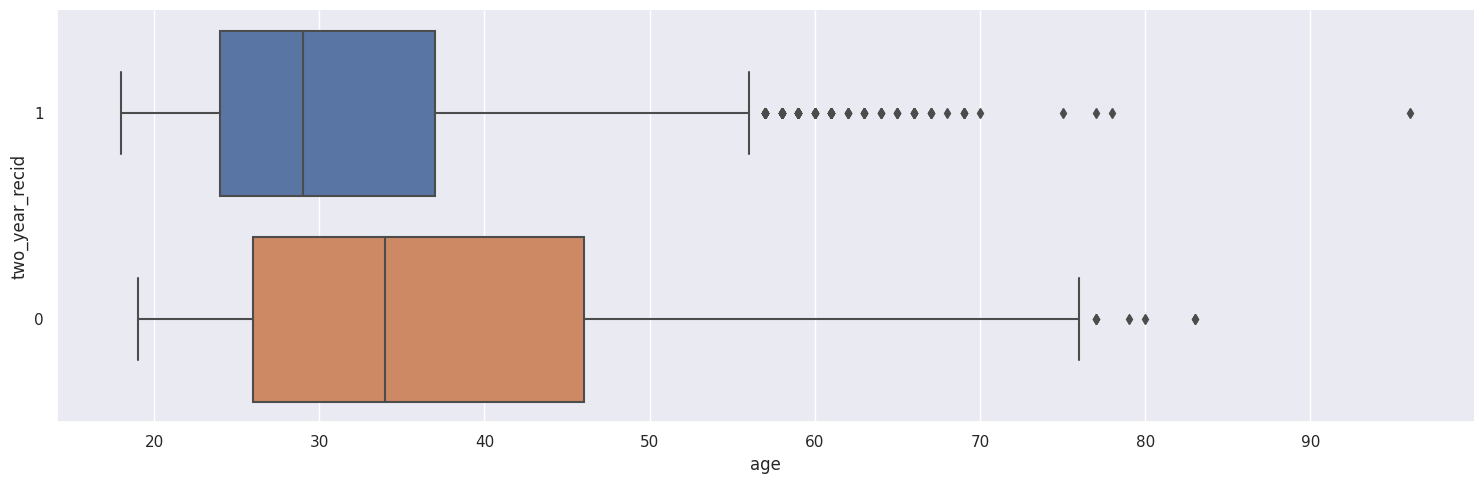

In [ ]:
sns.catplot(data=df_pre_data, x='age', y='two_year_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [ ]:
# Calculating t and p-val using 'steiger'
def dependent_corr_steiger_zou(ab, ac, bc, n, twotailed=True, conf_level=0.95):
    d = ab - ac
    determ = 1 - ab * ab - ac * ac - bc * bc + 2 * ab * ac * bc
    av = (ab + ac)/2
    cube = (1 - bc) * (1 - bc) * (1 - bc)

    t2 = d * np.sqrt((n - 1) * (1 + bc)/(((2 * (n - 1)/(n - 3)) * determ + av * av * cube)))
    p = 1 - t.cdf(abs(t2), n - 3)

    if twotailed:
        p *= 2

    return t2, p

In [ ]:
df_pre_data['age'].count()

7214

In [ ]:
dependent_corr_steiger_zou(corr_A_D, corr_A_TR, corr_D_T, 7214, twotailed = False)

(-15.868951111828865, 0.0)


The p-values of 0 indicate strong evidence that the relationship between age or decile score and recidivism is not due to random chance. The finding is that the risk scores might be a bit too optimistic about how much the chance of re-offending goes down for older people

## Hypothesis 2: The correlation between the decile score and recidivism differs between African-Americans and Caucasians.

In [54]:

data_aa = df_pre_data[df_pre_data['race'] == 'African-American']

data_caucasian = df_pre_data[df_pre_data['race'] == 'Caucasian']

xy = data_aa['decile_score'].corr(data_aa['two_year_recid'])

xz = data_caucasian['decile_score'].corr(data_caucasian['two_year_recid'])

# correlation coefficient between recidivism for African-Americans and Caucasians
yz = data_aa['decile_score'].corr(data_caucasian['decile_score'])
# Print the correlation coefficients
print("Correlation for African-Americans (xy):", xy)
print("Correlation for Caucasians (xz):", xz)
print("Correlation between African-Americans and Caucasians (yz):", yz)


Correlation for African-Americans (xy): 0.33389497211860025
Correlation for Caucasians (xz): 0.33585251640417824
Correlation between African-Americans and Caucasians (yz): nan


The hypothesis stated that the correlation between the decile score and recidivism is slightly different
(0.002) for African-Americans than for Caucasians. So this low difference provided correlation coefficients alone do not directly address the hypothesis.

## Hypothesis 3: The correlation between COMPAS risk scores and recidivism is greater for men compared to women.

In [55]:
xy = (df_pre_data[(df_pre_data.sex == 'Male')].decile_score).corr(df_pre_data['two_year_recid'])
xy

0.352496073218259

In [56]:
df_pre_data[(df_pre_data.sex == 'Male')].count()

id                      5819
name                    5819
first                   5819
last                    5819
sex                     5819
dob                     5819
age                     5819
age_cat                 5819
race                    5819
decile_score            5819
priors_count            5819
c_jail_in               5579
c_jail_out              5579
c_offense_date          4862
c_charge_degree         5819
c_charge_desc           5798
is_recid                5819
r_charge_degree         2941
r_days_from_arrest      1970
r_offense_date          2941
r_charge_desc           2893
r_jail_in               1970
r_jail_out              1970
violent_recid              0
is_violent_recid        5819
type_of_assessment      5819
decile_score.1          5819
score_text              5819
screening_date          5819
v_type_of_assessment    5819
v_decile_score          5819
v_score_text            5819
v_screening_date        5819
in_custody              5642
out_custody   

In [57]:
yz = (df_pre_data[(df_pre_data.sex == 'Female')].decile_score).corr(df_pre_data['two_year_recid'])
yz

0.32374005157403946

In [ ]:
df_pre_data[(df_pre_data.sex == 'Female')].count()

id                      1395
name                    1395
first                   1395
last                    1395
sex                     1395
dob                     1395
age                     1395
age_cat                 1395
race                    1395
decile_score            1395
priors_count            1395
c_jail_in               1328
c_jail_out              1328
c_offense_date          1193
c_charge_degree         1395
c_charge_desc           1387
is_recid                1395
r_charge_degree          530
r_days_from_arrest       346
r_offense_date           530
r_charge_desc            520
r_jail_in                346
r_jail_out               346
violent_recid              0
is_violent_recid        1395
type_of_assessment      1395
decile_score.1          1395
score_text              1395
screening_date          1395
v_type_of_assessment    1395
v_decile_score          1395
v_score_text            1395
v_screening_date        1395
in_custody              1336
out_custody   

In [58]:
def independent_corr_fisher(ab, bc, n, n2 = None, twotailed=True, conf_level=0.95):

    xy_z = 0.5 * np.log((1 + ab)/(1 - ab))
    ab_z = 0.5 * np.log((1 + bc)/(1 - bc))
    if n2 is None:
        n2 = n

    se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z))
    if twotailed:
        p *= 2

    return z, p

In [60]:
independent_corr_fisher(xy, yz, 5819, 1395, twotailed = False)

(1.0882520987464257, 0.13824191539100616)

With a p-value of 0.14 at a significance level (alpha) of 0.05, we do not have sufficient evidence to say that the correlation between COMPAS risk scores and recidivism is significantly higher for men compared to women.